## Step 1: Load and Inspect Metadata

In [1]:
import pandas as pd
import os

# Specify the path to your CSV file
csv_file_path = 'Alzheimer_images_2_06_2024.csv'

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Print the DataFrame
df.head()


,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I1241409,425537,Patient,M,73,SCMRI,MRI,Axial T2-FSE with Fat Sat,Original,10/09/2019,DCM,5/18/2023
1,I1241402,425537,Patient,M,73,SCMRI,MRI,3 Plane Localizer,Original,10/09/2019,DCM,5/18/2023
2,I1241404,425537,Patient,M,73,SCMRI,MRI,Axial FLAIR,Original,10/09/2019,DCM,5/18/2023
3,I1241406,425537,Patient,M,73,SCMRI,MRI,Sag IR-FSPGR,Original,10/09/2019,DCM,5/18/2023
4,I1241401,425537,Patient,M,73,SCMRI,MRI,3 Plane Localizer,Original,10/09/2019,DCM,5/18/2023


In [8]:
df['Acq Date'].unique()

array(['10/09/2019', '11/13/2019', '10/11/2019', '10/24/2019',
       '7/07/2020', '8/13/2019', '8/16/2019', '8/12/2019', '6/14/2019',
       '7/17/2019', '7/30/2020', '5/15/2019', '5/20/2019', '3/27/2019',
       '5/19/2021', '6/22/2021', '6/07/2019', '3/28/2019', '5/01/2019',
       '1/24/2019', '2/24/2020', '1/11/2019', '3/05/2020', '11/20/2018',
       '2/15/2019', '11/13/2018', '1/16/2019', '10/08/2018', '12/16/2019',
       '7/18/2018', '8/22/2019', '6/26/2018', '11/26/2019', '10/30/2018',
       '1/21/2019', '12/18/2019', '8/06/2019', '7/23/2018', '2/10/2020',
       '11/14/2019', '8/02/2018', '10/02/2019', '6/22/2018', '6/26/2019',
       '6/05/2018', '8/20/2018', '3/04/2020', '6/12/2018', '10/15/2018',
       '7/16/2018', '2/22/2018', '5/21/2018', '5/31/2018', '9/25/2019',
       '4/11/2018', '10/19/2018', '6/25/2019', '4/24/2018', '6/11/2018',
       '8/28/2018', '1/29/2018', '6/07/2018', '9/19/2019', '9/04/2018',
       '11/13/2017', '2/07/2019', '11/30/2017', '12/15/2017', 

In [ ]:
df['Description'] == 'MPRAGE'

In [5]:
mprage_df = df[df['Description'] == 'MPRAGE']

In [15]:
mprage_df

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
27,I1249802,423937,Patient,M,75,SCMRI,MRI,MPRAGE,Original,10/24/2019,DCM,5/18/2023
481,I1190988,384044,Patient,M,69,SCMRI,MRI,MPRAGE,Original,6/12/2018,DCM,5/18/2023
499,I1023707,379152,Patient,F,68,SCMRI,MRI,MPRAGE,Original,7/16/2018,DCM,5/18/2023
515,I1318981,379152,Patient,F,69,M12,MRI,MPRAGE,Original,8/06/2019,DCM,5/18/2023
532,I1011334,376954,Patient,M,80,SCMRI,MRI,MPRAGE,Original,5/21/2018,DCM,5/18/2023
...,...,...,...,...,...,...,...,...,...,...,...,...
3840,I425955,80428,Patient,M,66,SCMRI,MRI,MPRAGE,Original,5/23/2014,DCM,5/18/2023
3856,I808260,79847,Patient,M,66,TAU,MRI,MPRAGE,Original,1/11/2017,DCM,5/18/2023
3858,I973355,79847,Patient,M,68,TAU2,MRI,MPRAGE,Original,3/12/2018,DCM,5/18/2023
3880,I472705,79847,Patient,M,65,M12,MRI,MPRAGE,Original,2/09/2015,DCM,5/18/2023


In [12]:
subj_1_df = mprage_df[mprage_df['Subject'] == '423937']

In [13]:
subj_1_df

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded


## Step 2: Metadata Analysis

In [3]:
# Display basic statistical details of 'Age' column in a DataFrame for better visualization
age_stats = df['Age'].describe().to_frame()
display(age_stats)

# Group by 'Modality' and 'Description', then count the occurrences, and display in a DataFrame
images_count = df.groupby(['Modality', 'Description']).size().reset_index(name='Count')
display(images_count)

# Count the occurrences of each 'Sex' category and display in a DataFrame
sex_distribution = df['Sex'].value_counts().reset_index()
sex_distribution.columns = ['Sex', 'Count']
display(sex_distribution)

# Unique number of visits per subject
visits_per_subject = df.groupby('Subject')['Visit'].nunique().reset_index()
visits_per_subject.columns = ['Subject', 'Unique Visits']
display(visits_per_subject)

# Total count of images per subject
images_per_subject = df.groupby('Subject').size().reset_index(name='Images Count')
display(images_per_subject)

,Age
count,4759.000000
mean,70.364783
std,4.711936
min,61.000000
25%,67.000000
50%,69.000000
75%,72.000000
max,87.000000


,Modality,Description,Count
0,MRI,3 PLANE LOCALIZER,3
1,MRI,3 Plane Localizer,1421
2,MRI,3 Plane Localizer (12-Channel),3
3,MRI,3-Plane Localizer,30
4,MRI,3Plane Loc SSFSE,198
...,...,...,...
66,MRI,T2-weighted trace,93
67,MRI,axial rsFMRI eyes open,4
68,MRI,localizer,3
69,MRI,localizer_ND,3


,Sex,Count
0,M,4700
1,F,59


,Subject,Unique Visits
0,3107,1
1,6315,2
2,6618,2
3,7721,2
4,8319,2
...,...,...
269,421933,2
270,423937,1
271,424030,1
272,425032,1


,Subject,Images Count
0,3107,8
1,6315,14
2,6618,15
3,7721,20
4,8319,18
...,...,...
269,421933,33
270,423937,11
271,424030,9
272,425032,8


In [4]:
df.shape

(4759, 12)

# MRI Sequences and Terms
### Axial T2-FSE with Fat Sat:
    "Axial" refers to the plane of imaging (slice orientation), "T2" is a type of MRI sequence that is good at highlighting fluid and edema, "FSE" (Fast Spin Echo) is a method to reduce scanning time, and "Fat Sat" (Fat Saturation) is used to suppress fat signals in the image.

### 3 Plane Localizer: 
    A quick scan used to locate the brain (or other anatomy) in three planes (axial, sagittal, coronal) to plan out the rest of the imaging study.

### Axial FLAIR: FLAIR (Fluid Attenuated Inversion Recovery):
    is a sequence that suppresses the fluid signal, making it useful for detecting lesions or pathology in the brain that might be obscured by cerebrospinal fluid on other types of scans.

### Sag IR-FSPGR:
    "Sag" stands for sagittal, another plane of imaging. "IR" means Inversion Recovery, a technique to enhance contrast. "FSPGR" (Fast Spoiled Gradient Echo) is a type of MRI sequence that provides high-resolution images quickly.

### Axial T2 Star:
    "T2*" (T2 Star) weighted imaging emphasizes magnetic susceptibility differences in tissues and is sensitive to blood, calcium, and iron deposits.

### Calibration Scan: 
    A preliminary scan to calibrate the MRI system for the specific patient and scan parameters.

### Sag IR-SPGR:
    Similar to Sag IR-FSPGR, but "SPGR" (Spoiled Gradient Recalled) is another type of gradient echo sequence.

### Field Mapping:
    A technique to measure field inhomogeneities in the MRI scanner, which can affect the quality of the images.

### MPRAGE:
    Magnetization Prepared Rapid Gradient Echo, a sequence often used for detailed brain imaging, excellent for evaluating brain structure and lesions.

### Localizer:
    Similar to 3 Plane Localizer, used to orient the subsequent scans.

### Axial DTI:
    Diffusion Tensor Imaging, a technique that maps the diffusion of water in tissue, especially useful for imaging white matter tracts in the brain.

### Axial rsfMRI (EYES OPEN):
    Resting-state functional MRI with the subject's eyes open, used to study brain function and connectivity by measuring changes in blood flow.

###### ASSET calibration:
    A technique to reduce scan time and improve image quality.

### SAG IR-SPGR / FSPGR:
    Variants of gradient echo sequences with specific parameters to enhance image contrast and detail.

# Step 3: Visualize Metadata Distributions

<!-- MRI Sequences and Terms
Axial T2-FSE with Fat Sat: "Axial" refers to the plane of imaging (slice orientation), "T2" is a type of MRI sequence that is good at highlighting fluid and edema, "FSE" (Fast Spin Echo) is a method to reduce scanning time, and "Fat Sat" (Fat Saturation) is used to suppress fat signals in the image.

3 Plane Localizer: A quick scan used to locate the brain (or other anatomy) in three planes (axial, sagittal, coronal) to plan out the rest of the imaging study.

Axial FLAIR: FLAIR (Fluid Attenuated Inversion Recovery) is a sequence that suppresses the fluid signal, making it useful for detecting lesions or pathology in the brain that might be obscured by cerebrospinal fluid on other types of scans.

Sag IR-FSPGR: "Sag" stands for sagittal, another plane of imaging. "IR" means Inversion Recovery, a technique to enhance contrast. "FSPGR" (Fast Spoiled Gradient Echo) is a type of MRI sequence that provides high-resolution images quickly.

Axial T2 Star: "T2*" (T2 Star) weighted imaging emphasizes magnetic susceptibility differences in tissues and is sensitive to blood, calcium, and iron deposits.

Calibration Scan: A preliminary scan to calibrate the MRI system for the specific patient and scan parameters.

Sag IR-SPGR: Similar to Sag IR-FSPGR, but "SPGR" (Spoiled Gradient Recalled) is another type of gradient echo sequence.

Field Mapping: A technique to measure field inhomogeneities in the MRI scanner, which can affect the quality of the images.

MPRAGE: Magnetization Prepared Rapid Gradient Echo, a sequence often used for detailed brain imaging, excellent for evaluating brain structure and lesions.

Localizer: Similar to 3 Plane Localizer, used to orient the subsequent scans.

Axial DTI: Diffusion Tensor Imaging, a technique that maps the diffusion of water in tissue, especially useful for imaging white matter tracts in the brain.

Axial rsfMRI (EYES OPEN): Resting-state functional MRI with the subject's eyes open, used to study brain function and connectivity by measuring changes in blood flow.

ASSET calibration: A technique to reduce scan time and improve image quality.

SAG IR-SPGR / FSPGR: Variants of gradient echo sequences with specific parameters to enhance image contrast and detail. -->

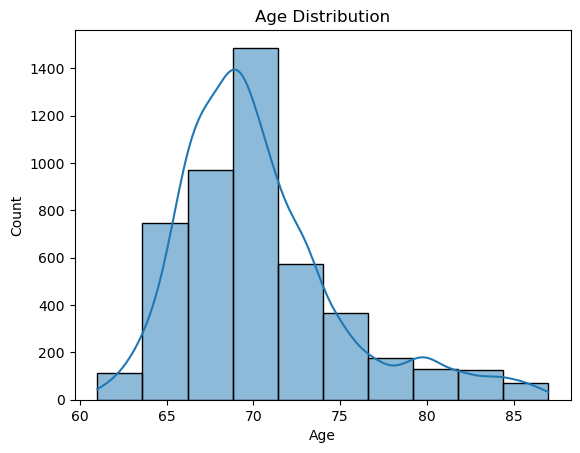

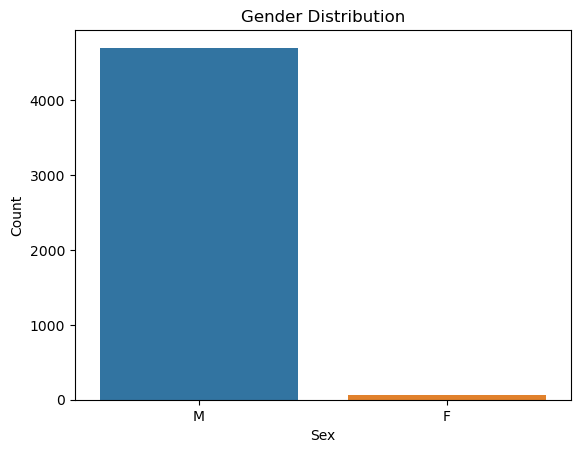

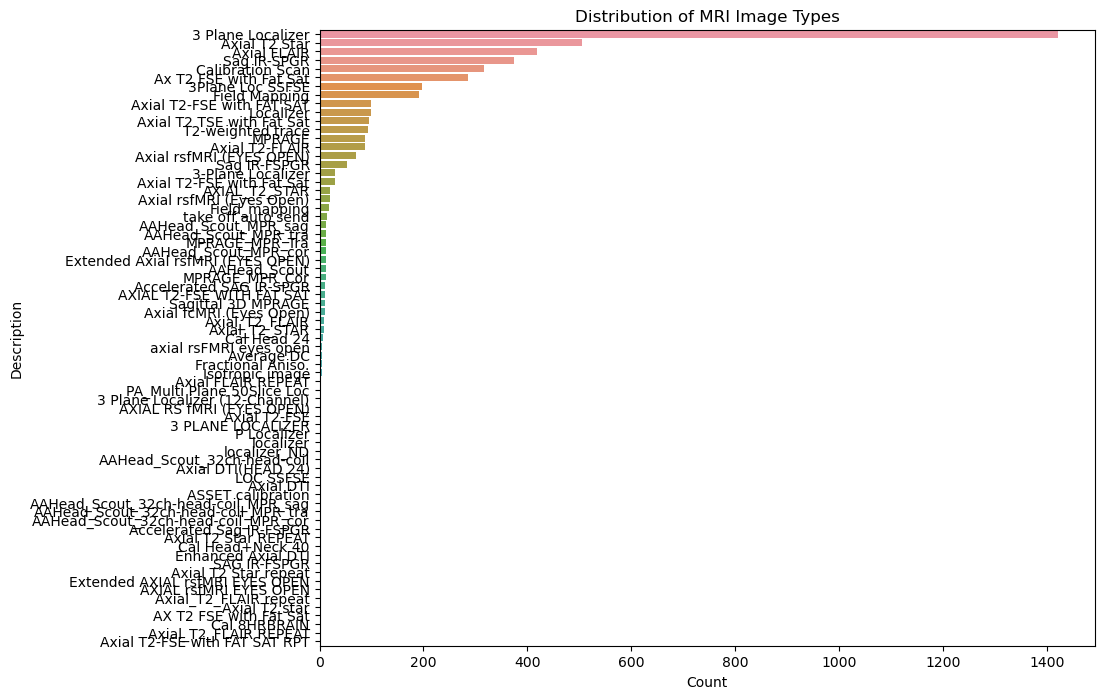

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender distribution
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Distribution of image types
plt.figure(figsize=(10, 8))
sns.countplot(y='Description', data=df, order = df['Description'].value_counts().index)
plt.title('Distribution of MRI Image Types')
plt.xlabel('Count')
plt.ylabel('Description')
plt.show()


# Step 4: Load and Visualize MRI Images


In [10]:
def creat_list_of_file(directory):
    MRI_files =[]
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".dcm"):
                MRI_files.append(os.path.join(root, file))
    return MRI_files

In [ ]:
'images/0003107\\3_Plane_Localizer\\2013-05-07_14_21_21.0\\I387195\\ADNIDOD_0003107_MR_3_Plane_Localizer__br_raw_20130927141417623_8_S199087_I387195.dcm'c

In [17]:
t3_Plane_Localizer_files_list = creat_list_of_file('images/0003107\\3_Plane_Localizer')
Ax_T2_FSE_with_Fat_Sat_files_list = creat_list_of_file('images/0003107\\Ax_T2_FSE_with_Fat_Sat')
Axial_FLAIR_files_list = creat_list_of_file('images/0003107\\Axial_FLAIR')
Axial_rsfMRI__EYES_OPEN_files_list = creat_list_of_file('images/0003107\\Axial_rsfMRI__EYES_OPEN_')
Axial_T2_Star_files_list = creat_list_of_file('images/0003107\\Axial_T2_Star')
Sag_IR_SPGR_files_list = creat_list_of_file('images/0003107\\Sag_IR-SPGR')


In [12]:
def select_first_file_from_each_dir(file_paths):
    selected_files = []
    seen_directories = set()
    
    for file_path in file_paths:
        directory = os.path.dirname(file_path)
        if directory not in seen_directories:
            seen_directories.add(directory)
            selected_files.append(file_path)
    
    return selected_files

In [13]:
selected_files = select_first_file_from_each_dir(dicom_files_list)


In [14]:
selected_files

['images/0003107\\3_Plane_Localizer\\2013-05-07_14_21_21.0\\I387195\\ADNIDOD_0003107_MR_3_Plane_Localizer__br_raw_20130927141417623_8_S199087_I387195.dcm',
 'images/0003107\\3_Plane_Localizer\\2013-05-07_14_21_21.0\\I387196\\ADNIDOD_0003107_MR_3_Plane_Localizer__br_raw_20130927141258902_1_S199087_I387196.dcm',
 'images/0003107\\3_Plane_Localizer\\2013-05-07_14_21_21.0\\I387197\\ADNIDOD_0003107_MR_3_Plane_Localizer__br_raw_20130927141300339_4_S199087_I387197.dcm',
 'images/0003107\\Axial_FLAIR\\2013-05-07_14_21_21.0\\I392450\\ADNIDOD_0003107_MR_Axial_FLAIR__br_raw_20130927141209838_20_S202397_I392450.dcm',
 'images/0003107\\Axial_rsfMRI__EYES_OPEN_\\2013-05-07_14_21_21.0\\I387201\\ADNIDOD_0003107_MR_Axial_rsfMRI__EYES_OPEN__br_raw_20130927141205619_7128_S199091_I387201.dcm',
 'images/0003107\\Axial_T2_Star\\2013-05-07_14_21_21.0\\I387199\\ADNIDOD_0003107_MR_Axial_T2_Star__br_raw_20130927141206431_14_S199089_I387199.dcm',
 'images/0003107\\Ax_T2_FSE_with_Fat_Sat\\2013-05-07_14_21_21.0\\I

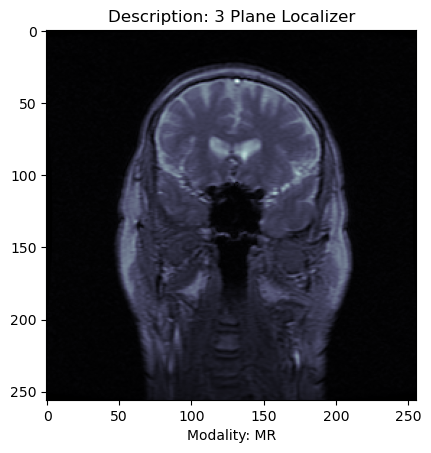

In [5]:
import pydicom
from pydicom.data import get_testdata_files
import matplotlib.pyplot as plt

# Function to load and display a single DICOM image
def display_image(dicom_file_path):
    ds = pydicom.dcmread(dicom_file_path)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.title(f"Description: {ds.SeriesDescription}")
    plt.xlabel(f"Modality: {ds.Modality}")
    plt.show()

# Example usage (update the path to an actual DICOM file path)
dicom_file_path = 'images/0003107/3_Plane_Localizer/2013-05-07_14_21_21.0/I387195/ADNIDOD_0003107_MR_3_Plane_Localizer__br_raw_20130927141417623_8_S199087_I387195.dcm'
display_image(dicom_file_path)


In [9]:
import pydicom

# Path to one of your DICOM files
dicom_file_path = 'images/0003107/3_Plane_Localizer/2013-05-07_14_21_21.0/I387195/ADNIDOD_0003107_MR_3_Plane_Localizer__br_raw_20130927141417623_8_S199087_I387195.dcm'

# Load the DICOM file
dicom_data = pydicom.dcmread(dicom_file_path)

# Print out some metadata
print("Patient ID:", dicom_data.PatientID)
print("Modality :type of imaging technology used :", dicom_data.Modality)
print("Slice Thickness:", dicom_data.SliceThickness)
print("Pixel Spacing:", dicom_data.PixelSpacing)


Patient ID: 0003107
Modality :type of imaging technology used : MR
Slice Thickness: 5
Pixel Spacing: [1.0156, 1.0156]


## Understanding the metadata from the DICOM MRI Images

#### Patient ID: a unique identifier of the patient
        
        
#### Modality :
        The modality indicates the type of imaging technology used to create the image. Common modalities include CT (Computed 
        Tomography), MRI (Magnetic Resonance Imaging), and X-ray.
    
#### Slice Thickness: 
        When an imaging modality like MRI or CT captures a slice with a thickness of 5 mm, it is effectively aggregating or averaging the signal 
        from all the structures within that 5 mm cross-section into a single 2D image slice. 
        This means that any anatomical features, differences 
        in tissue density, or other characteristics within that 5 mm depth are represented together in the slice.
    
        - Pixel Spacing, ex. [1.0156, 1.0156] : 
| Pixel 1 | Pixel 2 |
|---------|---------|
| Pixel 3 | Pixel 4 |

        Each pixel (Pixel 1, Pixel 2, Pixel 3, Pixel 4) represents a 1.0156 mm by 1.0156 mm area of the scanned tissue.

# Datadic exploration

In [16]:
datadic_df = pd.read_csv('DATADIC_03Apr2024.csv')

In [17]:
datadic_df.head()

,ID,SX,FLDNAME,TBLNAME,CRFNAME,QUESTION,TEXT,STATUS,DEPRULE,TYPE,...,VISIBLEVAL,VISIBLE,LOGVISIBLE,MTBLNAME,SUBTBLNAME,POPJSCPT,GRID,DEF,CONF,update_stamp
0,83,NaN,ID,DATADIC,NaN,NaN,NaN,NaN,NaN,N,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,{},2015-01-05 10:24:13.0
1,84,NaN,SX,DATADIC,NaN,NaN,NaN,NaN,NaN,N,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,{},2015-01-05 10:24:13.0
2,85,NaN,FLDNAME,DATADIC,NaN,NaN,NaN,NaN,NaN,T,...,NaN,return 2;,NaN,NaN,NaN,NaN,NaN,NaN,{},2015-01-05 10:24:13.0
3,86,NaN,TBLNAME,DATADIC,NaN,NaN,NaN,NaN,NaN,T,...,NaN,return 2;,NaN,NaN,NaN,NaN,NaN,NaN,{},2015-01-05 10:24:13.0
4,87,NaN,CRFNAME,DATADIC,NaN,NaN,NaN,NaN,NaN,T,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,{},2015-01-05 10:24:13.0
